In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('CLIENT.csv', encoding= "latin-1").sample(frac = 0.20)

In [6]:
df.head()

,resilies,typeqipmt,typeqipmt.1,evolution_equip,agelettre,anciennete,ageanc,pres_auto,demenagement,sinistre,...,ctc,devis2,devis3,devis4,devis5,devis6,devis7,devis8,cyclvie,cliCSP
198917,0,2,4,3,2,2,4,1,2,1,...,2,2,1,3,2,2,1,1,4,2.0
124807,0,2,4,3,2,2,4,2,2,1,...,2,1,1,3,1,1,1,1,4,2.0
408130,0,1,2,1,2,2,4,1,2,1,...,2,1,1,4,1,1,1,1,7,1.0
673626,0,1,2,1,2,2,4,1,2,1,...,1,1,1,4,1,1,1,1,2,2.0
786851,0,1,2,1,2,2,4,3,2,1,...,1,1,1,4,1,1,1,1,3,4.0


In [7]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [8]:
clean_dataset(df)

,resilies,typeqipmt,typeqipmt.1,evolution_equip,agelettre,anciennete,ageanc,pres_auto,demenagement,sinistre,...,ctc,devis2,devis3,devis4,devis5,devis6,devis7,devis8,cyclvie,cliCSP
198917,0.0,2.0,4.0,3.0,2.0,2.0,4.0,1.0,2.0,1.0,...,2.0,2.0,1.0,3.0,2.0,2.0,1.0,1.0,4.0,2.0
124807,0.0,2.0,4.0,3.0,2.0,2.0,4.0,2.0,2.0,1.0,...,2.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,4.0,2.0
408130,0.0,1.0,2.0,1.0,2.0,2.0,4.0,1.0,2.0,1.0,...,2.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,7.0,1.0
673626,0.0,1.0,2.0,1.0,2.0,2.0,4.0,1.0,2.0,1.0,...,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0
302157,0.0,1.0,2.0,1.0,2.0,2.0,4.0,3.0,2.0,0.0,...,2.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,7.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006887,0.0,2.0,4.0,3.0,2.0,2.0,4.0,1.0,2.0,0.0,...,2.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,7.0,7.0
1024061,0.0,2.0,1.0,4.0,2.0,1.0,3.0,1.0,1.0,0.0,...,2.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,3.0,2.0
9255,0.0,2.0,4.0,3.0,2.0,2.0,4.0,1.0,2.0,1.0,...,2.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,4.0,3.0
939174,0.0,2.0,4.0,3.0,2.0,2.0,4.0,1.0,2.0,1.0,...,2.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,4.0,4.0


In [9]:
y=df['resilies']
X=df.drop(['resilies'],1)

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, y)

SelectKBest(k=4, score_func=<function f_classif at 0x000002273F4E5288>)

In [12]:
from numpy import set_printoptions
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[3.398e+03 1.773e+03 2.552e+03 6.054e+02 5.683e+02 8.523e+02 4.281e+03
 2.620e+02 4.262e+02 2.039e+01 5.655e+01 6.668e+02 5.124e+01 3.729e+01
 1.239e+03 4.177e+03 8.770e-03 2.584e+02 2.059e+02 6.147e+00 5.376e-02
 5.286e+01 5.493e+02 9.307e+02 2.712e+01 2.209e+02 2.163e+02 2.114e+02
 2.639e+03 2.782e+02 4.414e+02 3.879e+00 8.531e+02 4.306e+01 3.179e+01
 4.625e-02 9.534e+00 4.150e+02 1.111e+00]
[[ 2.  1.  3. 12.]
 [ 2.  2.  7. 12.]
 [ 1.  1.  3.  1.]
 [ 1.  1.  3.  1.]
 [ 1.  3. 11.  2.]]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [16]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.linear_model import ElasticNet, SGDClassifier

In [23]:
reg = LassoCV(tol=1.0)
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000904
Best score using built-in LassoCV: 0.061214


In [24]:
print("Lasso a retenu " + str(sum(coef != 0)) + " variables et éliminé " +  str(sum(coef == 0)) + " variables")

Lasso a retenu 29 variables et éliminé 10 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

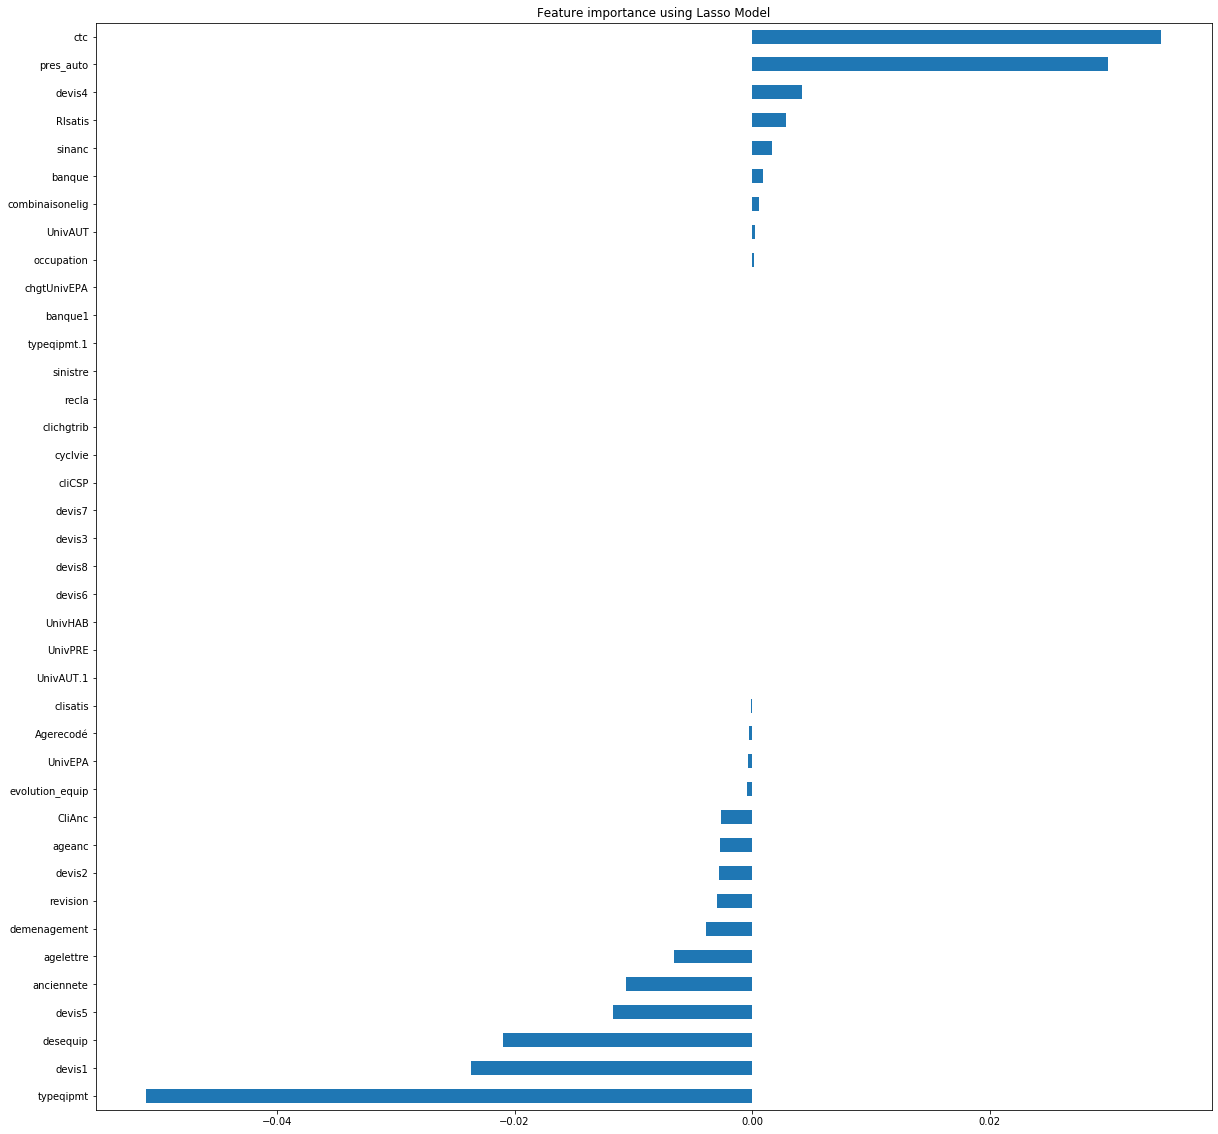

In [31]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [29]:
imp_coef[imp_coef > 0.02]

pres_auto    0.02996
ctc          0.03441
dtype: float64

In [30]:
imp_coef[imp_coef < -0.02]

typeqipmt   -0.050988
devis1      -0.023698
desequip    -0.020957
dtype: float64

In [8]:
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
ypred=svc.predict(X_test)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

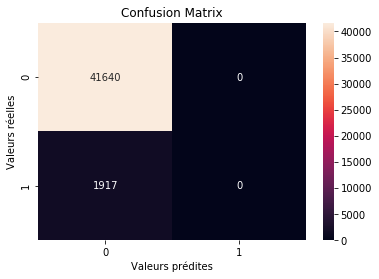

In [11]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,ypred), annot=True, ax = ax ,fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Valeurs prédites');ax.set_ylabel('Valeurs réelles'); 
ax.set_title('Confusion Matrix');